In [3]:
library('Seurat')
library('tidyverse')

In [2]:
# https://www.10xgenomics.com/datasets/20-k-mixture-of-nsclc-dt-cs-from-7-donors-3-v-3-1-3-1-standard-6-1-0

In [5]:
nsclc_m <- Read10X_h5("C:/Users/nidhi/Documents/scRNAseq/20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [6]:
str(nsclc_m)

List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:75593104] 184 7502 9727 10485 13480 21902 24894 25667 28658 31547 ...
  .. ..@ p       : int [1:3862364] 0 0 0 12 14 14 21 21 25 25 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:75593104] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "

In [8]:
counts <- nsclc_m$`Gene Expression`
counts[0:5,0:3]

5 x 3 sparse Matrix of class "dgCMatrix"
            AAACCCAAGAAACACT-1 AAACCCAAGAAACCAT-1 AAACCCAAGAAACCCA-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .

In [9]:
nsclc.sobj <- CreateSeuratObject(counts = counts, project="nsclc_test",min.cells=3,min.features=200)
str(nsclc.sobj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:63710619] 59 64 76 77 89 98 142 204 270 312 ...
  .. .. .. .. .. .. ..@ p       : int [1:42082] 0 789 1040 1401 1649 1950 8346 12231 12456 12884 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 42081
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:63710619] 1 2 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:42081, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ 

In [10]:
##### QC of raw counts #####
### 1. % MT ###

In [11]:
nsclc.sobj[["mt_percent"]] <- PercentageFeatureSet(nsclc.sobj, pattern="^MT-")
View(nsclc.sobj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,mt_percent
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAATTTGG-1,nsclc_test,1333,789,11.102776
AAACCCAAGAGATTCA-1,nsclc_test,295,251,4.406780
AAACCCAAGATTGACA-1,nsclc_test,470,361,2.127660
AAACCCAAGCAAATCA-1,nsclc_test,296,248,2.364865
AAACCCAAGCAATTCC-1,nsclc_test,364,301,2.472527
AAACCCAAGCACTGGA-1,nsclc_test,40874,6396,5.766502
AAACCCAAGCATGGGT-1,nsclc_test,13137,3885,2.542437
AAACCCAAGCCGTTGC-1,nsclc_test,260,225,1.923077
AAACCCAAGCCTCCAG-1,nsclc_test,4110,428,7.858881


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


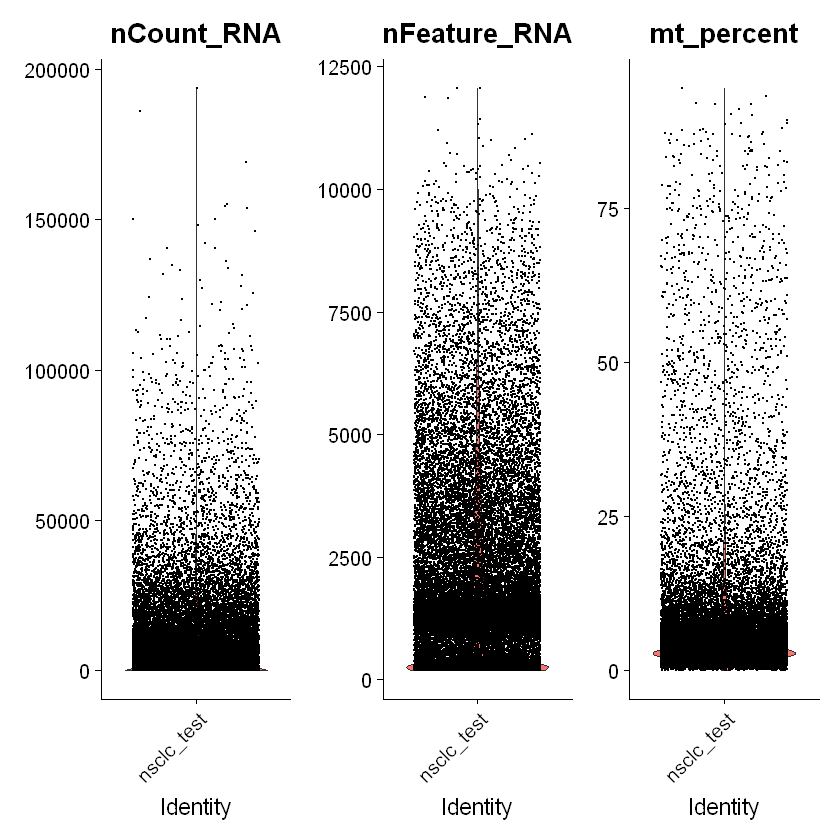

In [12]:
VlnPlot(nsclc.sobj,features=c("nCount_RNA", "nFeature_RNA", "mt_percent"), ncol=3)

In [13]:
# A lot of cells with large num of molecules detected
# A lot of cells with large high %mt count

`geom_smooth()` using formula = 'y ~ x'


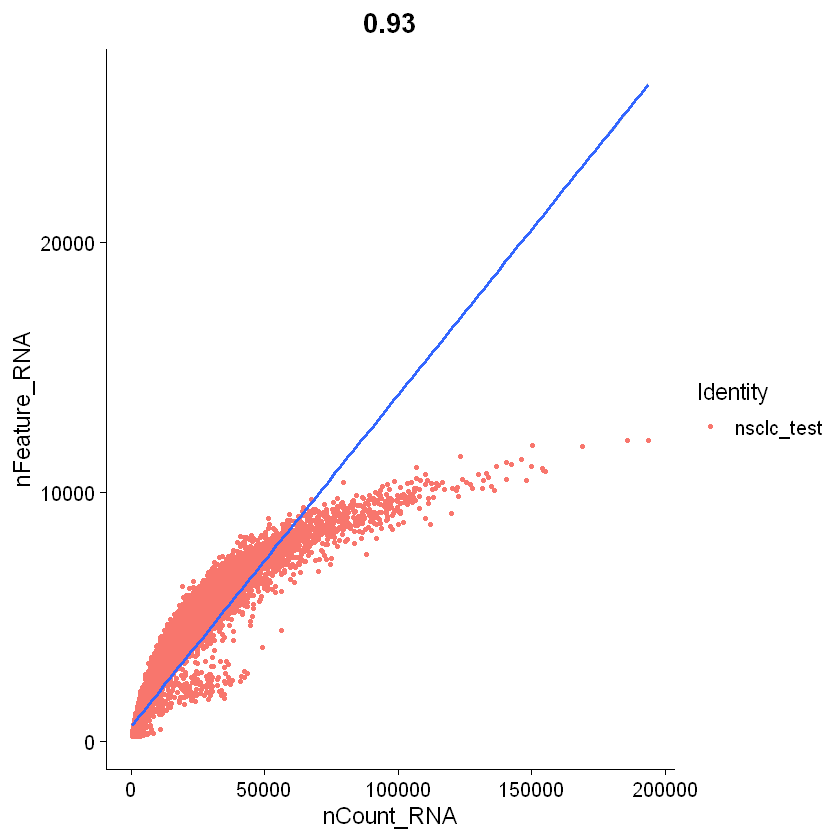

In [14]:
FeatureScatter(nsclc.sobj, feature1="nCount_RNA", feature2="nFeature_RNA") + geom_smooth(method='lm')

In [15]:
# good quality cells should have high number of genes AND high number of moleculesor counts
# Lower right corner: captured a few number of genes, sequenced over and over again so has high transcript count
# Top left corner: High number of genes captured but not deeply sequenced

In [16]:
### 2. Filtering ###

In [17]:
# Subset seurat obj 
nsclc.sobj
nsclc.sobj <- subset(nsclc.sobj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & mt_percent < 5 )
nsclc.sobj

An object of class Seurat 
29552 features across 42081 samples within 1 assay 
Active assay: RNA (29552 features, 0 variable features)
 1 layer present: counts

An object of class Seurat 
29552 features across 24708 samples within 1 assay 
Active assay: RNA (29552 features, 0 variable features)
 1 layer present: counts

In [18]:
### 3. Normalization ###

In [19]:
nsclc.sobj <- NormalizeData(nsclc.sobj, normalization.method = "LogNormalize", scale.factor = 10000) # default values
str(nsclc.sobj@commands)

Normalizing layer: counts



List of 1
 $ NormalizeData.RNA:Formal class 'SeuratCommand' [package "SeuratObject"] with 5 slots
  .. ..@ name       : chr "NormalizeData.RNA"
  .. ..@ time.stamp : POSIXct[1:1], format: "2024-12-08 13:25:57"
  .. ..@ assay.used : chr "RNA"
  .. ..@ call.string: chr [1:2] "NormalizeData(nsclc.sobj, normalization.method = \"LogNormalize\", " "    scale.factor = 10000)"
  .. ..@ params     :List of 5
  .. .. ..$ assay               : chr "RNA"
  .. .. ..$ normalization.method: chr "LogNormalize"
  .. .. ..$ scale.factor        : num 10000
  .. .. ..$ margin              : num 1
  .. .. ..$ verbose             : logi TRUE


In [20]:
### 4. Feature selection ###
# Idenify cells with high cell to cell variation

In [21]:
nsclc.sobj <- FindVariableFeatures( nsclc.sobj, selection.method = "vst", nfeatures = 2000)  # default values

Finding variable features for layer counts



In [22]:
# top 10 most variable genes
top10 <- head(VariableFeatures( nsclc.sobj), 10)
top10

[1] "IGHG1"  "IGKC"   "IGHA1"  "IGHG3"  "IGLC2"  "TPSB2"  "TPSAB1" "IGHM"  
 [9] "JCHAIN" "IGHGP"

In [23]:
# Plot variable features

Warning message:
"Transformation introduced infinite values in continuous x-axis"


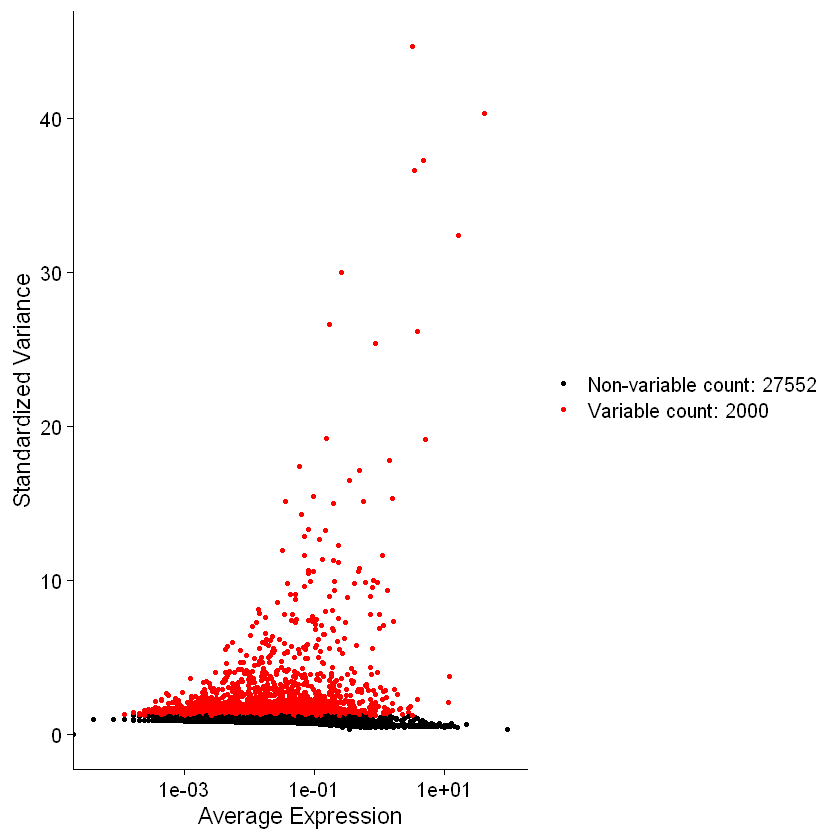

In [28]:
plot1 <- VariableFeaturePlot(nsclc.sobj)
plot1

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"


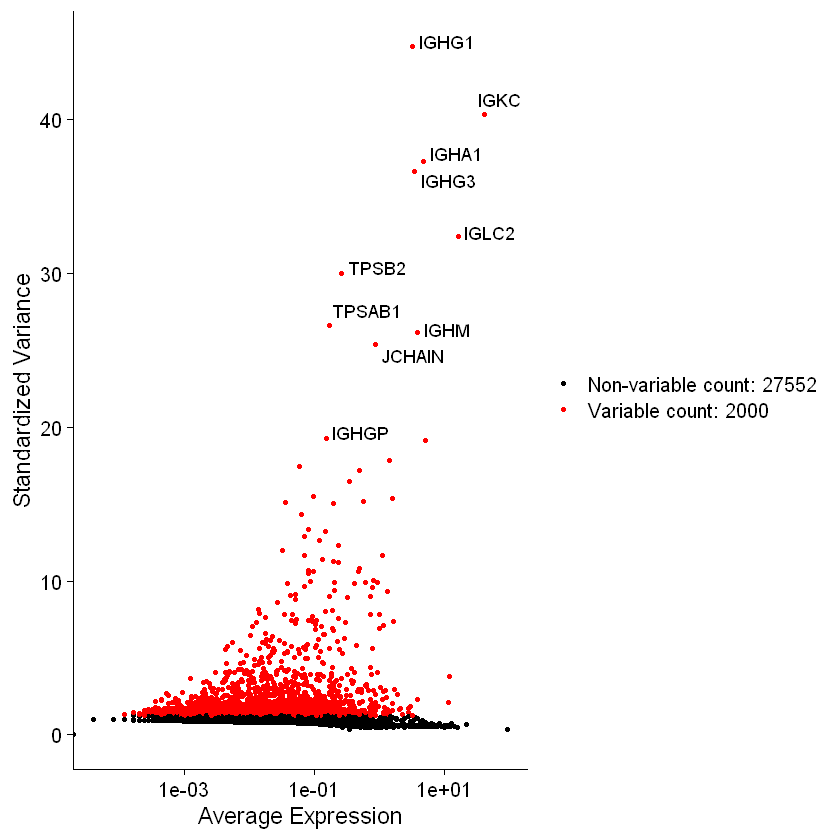

In [25]:
LabelPoints(plot = plot1, points = top10, repel = TRUE)

In [32]:
### 5. Scaling ###
#  linear transformation before dim reduction

In [37]:
all.genes <- rownames(nsclc.sobj)
memory.limit(27000) #https://github.com/satijalab/seurat/issues/2997
nsclc.sobj <- ScaleData(nsclc.sobj, features = all.genes)

[1] 27000

Centering and scaling data matrix



In [38]:
str(nsclc.sobj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 860 1161 1386 1601 1838 2105 2397 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 24708
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:15577418] 1 1 1 1 1 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 25

In [ ]:
### 6. Linear dimensionality reduction ###

In [42]:
nsclc.sobj <- RunPCA(nsclc.sobj, features = VariableFeatures(object = nsclc.sobj))
print(nsclc.sobj[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  MTRNR2L12, CD69, CREM, LTB, CD7, IL32, CCL5, TXNIP, S100A4, DUSP2 
	   CLEC2B, IL7R, ZNF331, TUBA4A, DUSP4, ITM2A, RORA, TRBC1, BCAS2, NKG7 
	   PIK3R1, PMAIP1, RGCC, GZMA, TIGIT, CYTOR, GPR65, CEMIP2, NR4A2, CD27 
Negative:  FTL, SPP1, APOE, CXCL8, IGHA1, IGLC2, COL3A1, KRT19, COL1A2, CXCL1 
	   SFTPB, SFTPC, WFDC2, COL1A1, ELF3, SCGB3A1, APOC1, KRT18, LYZ, MDK 
	   TCIM, IGHG4, SCGB3A2, IFI27, TM4SF1, TFF3, CXCL2, TACSTD2, SPARC, MGST1 
PC_ 2 
Positive:  FCN1, AIF1, CD68, AC020656.1, S100A8, S100A9, TYROBP, FCER1G, C5AR1, IFI30 
	   SMIM25, FTL, CD14, TREM1, CYBB, PLAUR, CST3, NCF2, FCGR2A, EREG 
	   VCAN, CTSS, OLR1, CLEC4E, IL1RN, SPI1, LST1, PLEK, FPR1, PHACTR1 
Negative:  IL32, CD7, CCL5, TRBC1, ITM2A, GZMA, RORA, IL7R, NKG7, TIGIT 
	   TUBA4A, KLRK1, CTSW, CD69, IFNG, TRAT1, ICOS, CD8A, GPR171, GZMH 
	   SH2D1A, GZMK, KLRD1, GIMAP7, BATF, CD8B, AC243960.1, LINC02446, TRGC2, TNFRSF18 
PC_ 3 
Positive:  MS4A1, BANK1, CD79A, VPREB3, TNFRSF13C, MEF2C, LY9, TNFRSF13

PC_ 1 
Positive:  MTRNR2L12, CD69, CREM, LTB, CD7 
Negative:  FTL, SPP1, APOE, CXCL8, IGHA1 
PC_ 2 
Positive:  FCN1, AIF1, CD68, AC020656.1, S100A8 
Negative:  IL32, CD7, CCL5, TRBC1, ITM2A 
PC_ 3 
Positive:  MS4A1, BANK1, CD79A, VPREB3, TNFRSF13C 
Negative:  NKG7, CCL5, IL32, GZMA, CD7 
PC_ 4 
Positive:  TNFRSF4, CTLA4, BATF, ICA1, MAF 
Negative:  NKG7, KLRD1, KLRK1, CCL5, GZMH 
PC_ 5 
Positive:  FCN1, MS4A1, BANK1, CD69, TXNIP 
Negative:  DERL3, MZB1, JCHAIN, EGLN3, CLIC3 


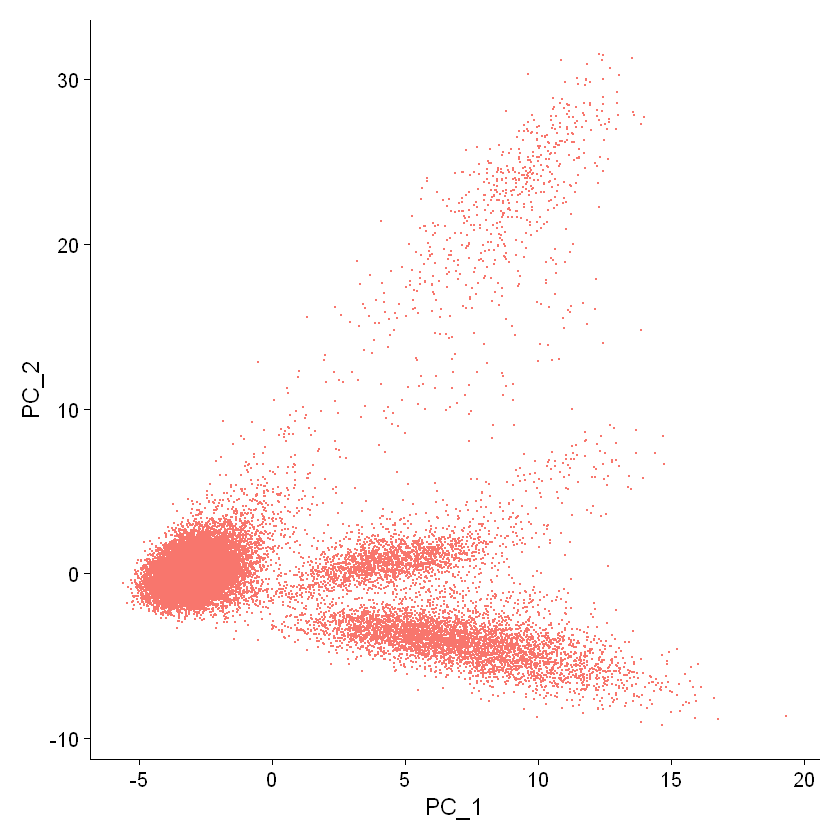

In [49]:
DimPlot(nsclc.sobj, reduction = "pca") + NoLegend()

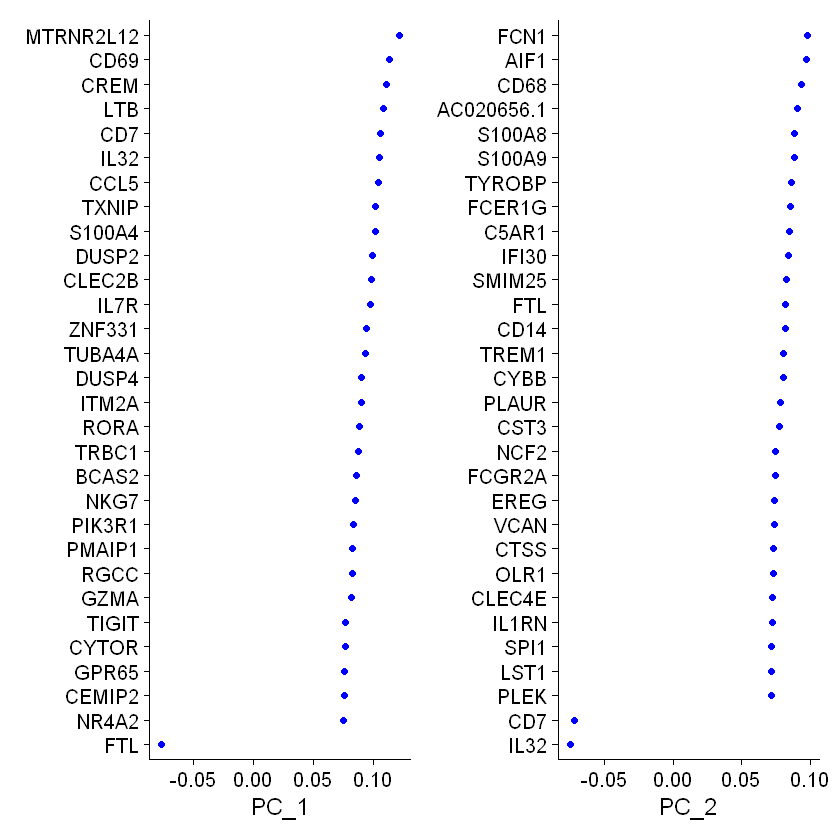

In [51]:
VizDimLoadings(nsclc.sobj, dims = 1:2, reduction = "pca")

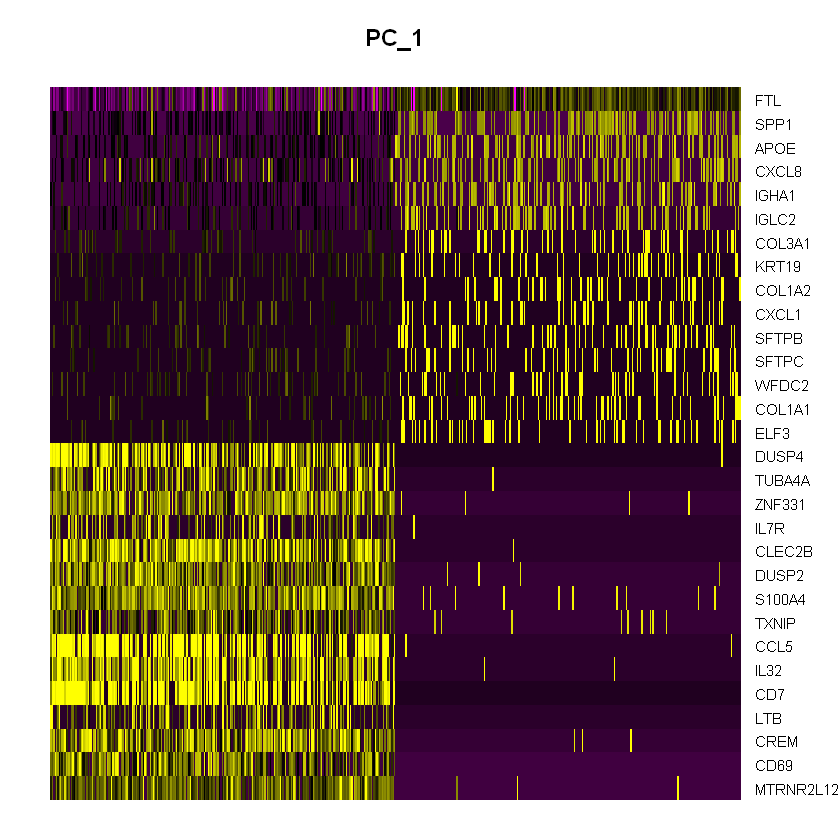

In [43]:
DimHeatmap(nsclc.sobj, dims = 1, cells = 500, balanced = TRUE)

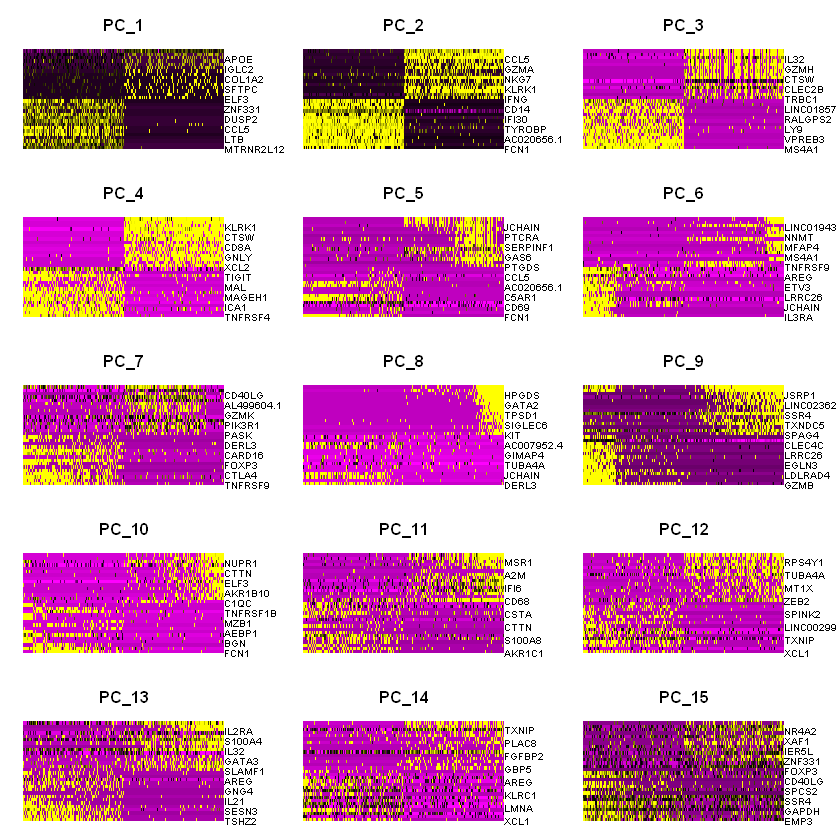

In [45]:
DimHeatmap(nsclc.sobj, dims = 1:15, cells = 500, balanced = TRUE)